<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [ ]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority 

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram 

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,f153cd45-8359-48d5-9e9c-21130b3922a0,Pian Sopian,https://play-lh.googleusercontent.com/a-/ACB-R...,Sangat mengecewakan fitur untuk komplen (live ...,1,40,5.30.2,2023-03-19 09:53:09,None,NaT
1,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/ACB-R...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,405,5.27.3,2023-01-05 15:39:31,None,NaT
2,20fa8261-e6cc-41a2-85bc-a07498e2d4ca,Pujo Hartono,https://play-lh.googleusercontent.com/a-/ACB-R...,Sangat membantu dan mempermudah dlm berbelanja...,5,101,5.29.2,2023-02-27 14:00:43,None,NaT
3,f5ff5922-0a70-417e-9859-6d6e29e3d191,CKN Official,https://play-lh.googleusercontent.com/a-/ACB-R...,Sudah TF uang ke virtual account nominal 735rb...,1,64,5.28.0,2023-01-24 02:12:23,None,NaT
4,ce62c010-8e9a-4444-b117-7c0f092b61bf,F Pasaribu,https://play-lh.googleusercontent.com/a-/ACB-R...,Saya sebagai seller di bukalapak. Beberapa Kal...,1,55,5.28.0,2023-02-01 07:23:35,None,NaT


In [ ]:
len(df_busu.index) #count the number of data we got

1300

In [ ]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Rahmat putra,1,2023-01-13 00:24:18,Saya Kendala pembayaran nyari solusi di live c...
1296,Mw Mwilmut,4,2020-12-27 18:33:15,"Flash deal BL harga nya menipu, dinaikin dulu ..."
1297,Abdul W N,5,2020-09-02 14:07:47,Semoga kedepannya fitur klaim barang rusak/kom...
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,"Belanja jadi mudah,saya suka. Siiiiip lah"
1299,ancha Penyu,1,2023-03-02 13:28:14,Dana saya tiba2 di bekukan dengan alasan menja...


In [ ]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [ ]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Rahmat putra,1,2023-01-13 00:24:18,Saya Kendala pembayaran nyari solusi di live c...
1296,Mw Mwilmut,4,2020-12-27 18:33:15,"Flash deal BL harga nya menipu, dinaikin dulu ..."
1297,Abdul W N,5,2020-09-02 14:07:47,Semoga kedepannya fitur klaim barang rusak/kom...
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,"Belanja jadi mudah,saya suka. Siiiiip lah"
1299,ancha Penyu,1,2023-03-02 13:28:14,Dana saya tiba2 di bekukan dengan alasan menja...


In [ ]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Pian Sopian,1,2023-03-19 09:53:09,Sangat mengecewakan fitur untuk komplen (live ...
1,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
2,Pujo Hartono,5,2023-02-27 14:00:43,Sangat membantu dan mempermudah dlm berbelanja...
3,CKN Official,1,2023-01-24 02:12:23,Sudah TF uang ke virtual account nominal 735rb...
4,F Pasaribu,1,2023-02-01 07:23:35,Saya sebagai seller di bukalapak. Beberapa Kal...


In [ ]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [ ]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [ ]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [ ]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [ ]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [ ]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb..."
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina..."
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap..."
...,...,...,...,...,...
1295,Rahmat putra,1,2023-01-13 00:24:18,saya kendala pembayaran nyari solusi di live c...,"[saya, kendala, pembayaran, nyari, solusi, di,..."
1296,Mw Mwilmut,4,2020-12-27 18:33:15,flash deal bl harga nya menipu dinaikin dulu t...,"[flash, deal, bl, harga, nya, menipu, dinaikin..."
1297,Abdul W N,5,2020-09-02 14:07:47,semoga kedepannya fitur klaim barang rusakkomp...,"[semoga, kedepannya, fitur, klaim, barang, rus..."
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,belanja jadi mudahsaya suka siiiiip lah,"[belanja, jadi, mudahsaya, suka, siiiiip, lah]"


In [ ]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [ ]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
162,Zayyad Hac,1,2023-03-21 08:33:14,stelah sekian tahun lamanya belanja bayar tag...,"[stelah, sekian, tahun, lamanya, belanja, baya..."
933,Zakir Asfal Official,2,2023-03-20 13:25:12,banyak iklannya ngeleg banget voucher zonk ttk...,"[banyak, iklannya, ngeleg, banget, voucher, zo..."
1144,buang sinaga,5,2023-03-20 13:16:34,aplikasi mudah dan user friendly,"[aplikasi, mudah, dan, user, friendly]"
344,Irham arlanka,5,2023-03-20 13:01:13,sejauh ini aplikasi ini membuat belanja dan pe...,"[sejauh, ini, aplikasi, ini, membuat, belanja,..."
14,Hera Wati,1,2023-03-20 12:46:43,susah sekali untuk menghubungi customer servis...,"[susah, sekali, untuk, menghubungi, customer, ..."


In [ ]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [ ]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tidak, 4), (tp, 3), (transaksi, 3), (saya, 3...
1    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
2    [(dan, 2), (di, 2), (bayar, 2), (sangat, 1), (...
3    [(uang, 4), (sudah, 2), (tidak, 2), (saya, 2),...
4    [(saya, 3), (seller, 2), (dengan, 2), (pengiri...
Name: Ulasan_tokenize, dtype: object


In [ ]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [sangat, mengecewakan, fitur, untuk, komplen, ...
1       [aplikasi, parah, saya, belanja, dengan, cc, p...
2       [sangat, membantu, dan, mempermudah, dlm, berb...
3       [sudah, tf, uang, ke, virtual, account, nomina...
4       [saya, sebagai, seller, di, bukalapak, beberap...
                              ...                        
1295    [saya, kendala, pembayaran, nyari, solusi, di,...
1296    [flash, deal, bl, harga, nya, menipu, dinaikin...
1297    [semoga, kedepannya, fitur, klaim, barang, rus...
1298       [belanja, jadi, mudahsaya, suka, siiiiip, lah]
1299    [dana, saya, tiba, di, bekukan, dengan, alasan...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [ ]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [ ]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [ ]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be..."
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina..."
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap..."
...,...,...,...,...,...,...
1295,Rahmat putra,1,2023-01-13 00:24:18,saya kendala pembayaran nyari solusi di live c...,"[saya, kendala, pembayaran, nyari, solusi, di,...","[saya, kendala, pembayaran, mencari, solusi, d..."
1296,Mw Mwilmut,4,2020-12-27 18:33:15,flash deal bl harga nya menipu dinaikin dulu t...,"[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin..."
1297,Abdul W N,5,2020-09-02 14:07:47,semoga kedepannya fitur klaim barang rusakkomp...,"[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus..."
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,belanja jadi mudahsaya suka siiiiip lah,"[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, jadi, mudahsaya, suka, siiiiip, lah]"


In [ ]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [sangat, mengecewakan, fitur, untuk, komplen, ...
1       [aplikasi, parah, saya, belanja, dengan, cc, p...
2       [sangat, membantu, dan, mempermudah, dalam, be...
3       [sudah, tf, uang, ke, virtual, account, nomina...
4       [saya, sebagai, seller, di, bukalapak, beberap...
                              ...                        
1295    [saya, kendala, pembayaran, mencari, solusi, d...
1296    [flash, deal, bl, harga, nya, menipu, dinaikin...
1297    [semoga, kedepannya, fitur, klaim, barang, rus...
1298       [belanja, jadi, mudahsaya, suka, siiiiip, lah]
1299    [dana, saya, tiba, di, bekukan, dengan, alasan...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [ ]:
from nltk.corpus import stopwords

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ...","[mengecewakan, fitur, komplen, live, chat, sat..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be...","[membantu, mempermudah, berbelanjatp, tolong, ..."
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina...","[tf, uang, virtual, account, nominal, ribu, no..."
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ..."
...,...,...,...,...,...,...,...
1295,Rahmat putra,1,2023-01-13 00:24:18,saya kendala pembayaran nyari solusi di live c...,"[saya, kendala, pembayaran, nyari, solusi, di,...","[saya, kendala, pembayaran, mencari, solusi, d...","[kendala, pembayaran, mencari, solusi, live, c..."
1296,Mw Mwilmut,4,2020-12-27 18:33:15,flash deal bl harga nya menipu dinaikin dulu t...,"[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin..."
1297,Abdul W N,5,2020-09-02 14:07:47,semoga kedepannya fitur klaim barang rusakkomp...,"[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus..."
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,belanja jadi mudahsaya suka siiiiip lah,"[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, mudahsaya, suka, siiiiip]"


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 1.1 MB/s eta 0:00:00


In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=85126327f5875cfe454829f760ac5ece5b10aa505e109bc85f2d9b62a73a46f7
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4531
------------------------
mengecewakan : kecewa
fitur : fitur
komplen : komplen
live : live
chat : chat
satusatunya : satusatunya
akses : akses
berfungsihatihati : berfungsihatihati
transaksi : transaksi
aplikasi : aplikasi
bl : bl
xufsinv : xufsinv
diproses : proses
melebihi : lebih
batas : batas
maksimal : maksimal
dbatalkan : dbatalkan
uang : uang
tertahan : tahan
jelasjelas : jelasjelas
tertera : tera
proses : proses
otomatis : otomatis
batal : batal
keterangan : terang
parah : parah
belanja : belanja
cc : cc
pilih : pilih
klik : klik
cicilan : cicil
tertagih : tagih
full : full
confirmasi : confirmasi
urus : urus
teman : teman
metode : metode
korban : korban
kabar : kabar
bukalapak : bukalapak
membantu : bantu
mempermudah : mudah
berbelanjatp : berbelanjatp
tolong : tolong
pembayarannya : bayar
produk : produk
permudah : mudah
pembeli : beli
bebas : bebas
bayar : bayar
persulit : sulit
contohhanya : contohhanya
berlaku : laku
pakai : pakai
dana : dana
apalah : apa
membanyaki :

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [ ]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [ ]:
name_dataframe.to_excel("tokped_text.xlsx")

In [ ]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [ ]:
tokenize_ulasan = word_tokenize(ulasan)

In [ ]:
tokenize_ulasan

['kecewa',
 'fitur',
 'komplen',
 'live',
 'chat',
 'satusatunya',
 'akses',
 'komplen',
 'berfungsihatihati',
 'transaksi',
 'aplikasi',
 'transaksi',
 'bl',
 'xufsinv',
 'proses',
 'lebih',
 'batas',
 'maksimal',
 'dbatalkan',
 'uang',
 'tahan',
 'jelasjelas',
 'tera',
 'lebih',
 'proses',
 'otomatis',
 'batal',
 'transaksi',
 'terang',
 'proses',
 'batal',
 'otomatis',
 'uang',
 'tahan',
 'aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'full',
 'confirmasi',
 'urus',
 'teman',
 'belanja',
 'metode',
 'cicil',
 'korban',
 'kabar',
 'bukalapak',
 'bantu',
 'mudah',
 'berbelanjatp',
 'tolong',
 'bayar',
 'produk',
 'mudah',
 'beli',
 'bebas',
 'bayar',
 'sulit',
 'contohhanya',
 'laku',
 'bayar',
 'pakai',
 'aplikasi',
 'dana',
 'apa',
 'banyak',
 'diskon',
 'ongkir',
 'nya',
 'tf',
 'uang',
 'virtual',
 'account',
 'nominal',
 'ribu',
 'notifikasi',
 'transaksi',
 'terima',
 'uang',
 'bukalapak',
 'uang',
 'mana',
 'lari',
 'hubung',
 'customer',
 'ser

In [ ]:
fqdist = FreqDist(tokenize_ulasan)

In [ ]:
fqdist

FreqDist({'bukalapak': 565, 'aplikasi': 443, 'nya': 407, 'barang': 389, 'bayar': 264, 'pakai': 255, 'belanja': 243, 'beli': 236, 'kirim': 227, 'buka': 224, ...})

In [ ]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 565),
 ('aplikasi', 443),
 ('nya', 407),
 ('barang', 389),
 ('bayar', 264),
 ('pakai', 255),
 ('belanja', 243),
 ('beli', 236),
 ('kirim', 227),
 ('buka', 224),
 ('lapak', 197),
 ('transaksi', 192),
 ('jual', 192),
 ('bantu', 164),
 ('bagus', 149)]

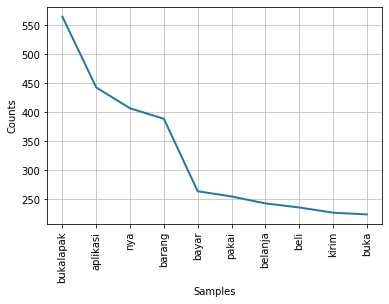

In [ ]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [ ]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ...","[mengecewakan, fitur, komplen, live, chat, sat...","[kecewa, fitur, komplen, live, chat, satusatun...",kecewa fitur komplen live chat satusatunya aks...,0
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be...","[membantu, mempermudah, berbelanjatp, tolong, ...","[bantu, mudah, berbelanjatp, tolong, bayar, pr...",bantu mudah berbelanjatp tolong bayar produk m...,1
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina...","[tf, uang, virtual, account, nominal, ribu, no...","[tf, uang, virtual, account, nominal, ribu, no...",tf uang virtual account nominal ribu notifikas...,0
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0
...,...,...,...,...,...,...,...,...,...,...
1295,Rahmat putra,1,2023-01-13 00:24:18,saya kendala pembayaran nyari solusi di live c...,"[saya, kendala, pembayaran, nyari, solusi, di,...","[saya, kendala, pembayaran, mencari, solusi, d...","[kendala, pembayaran, mencari, solusi, live, c...","[kendala, bayar, cari, solusi, live, chat, ket...",kendala bayar cari solusi live chat ketemu ket...,0
1296,Mw Mwilmut,4,2020-12-27 18:33:15,flash deal bl harga nya menipu dinaikin dulu t...,"[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, tipu, dinaikin, ...",flash deal bl harga nya tipu dinaikin olah ket...,1
1297,Abdul W N,5,2020-09-02 14:07:47,semoga kedepannya fitur klaim barang rusakkomp...,"[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus...","[moga, depan, fitur, klaim, barang, rusakkompl...",moga depan fitur klaim barang rusakkomplainnya...,1
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,belanja jadi mudahsaya suka siiiiip lah,"[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, mudahsaya, suka, siiiiip]","[belanja, mudahsaya, suka, siiiiip]",belanja mudahsaya suka siiiiip,1


In [ ]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ...","[mengecewakan, fitur, komplen, live, chat, sat...","[kecewa, fitur, komplen, live, chat, satusatun...",kecewa fitur komplen live chat satusatunya aks...,0
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be...","[membantu, mempermudah, berbelanjatp, tolong, ...","[bantu, mudah, berbelanjatp, tolong, bayar, pr...",bantu mudah berbelanjatp tolong bayar produk m...,1
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina...","[tf, uang, virtual, account, nominal, ribu, no...","[tf, uang, virtual, account, nominal, ribu, no...",tf uang virtual account nominal ribu notifikas...,0
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0


In [ ]:
from textblob import TextBlob


In [ ]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [ ]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,Month
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ...","[mengecewakan, fitur, komplen, live, chat, sat...","[kecewa, fitur, komplen, live, chat, satusatun...",kecewa fitur komplen live chat satusatunya aks...,0,0.136364,0.50,Positive,March
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.350000,0.55,Positive,January
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be...","[membantu, mempermudah, berbelanjatp, tolong, ...","[bantu, mudah, berbelanjatp, tolong, bayar, pr...",bantu mudah berbelanjatp tolong bayar produk m...,1,0.000000,0.00,Neutral,February
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina...","[tf, uang, virtual, account, nominal, ribu, no...","[tf, uang, virtual, account, nominal, ribu, no...",tf uang virtual account nominal ribu notifikas...,0,0.136364,0.50,Positive,January
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0,0.000000,0.00,Neutral,February


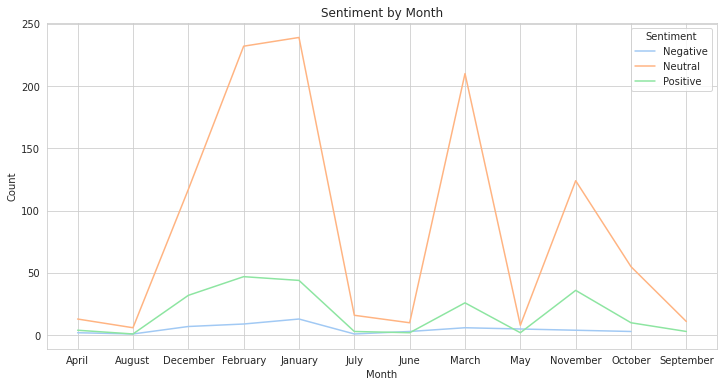

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['Month', 'Sentiment']).size().reset_index(name='Count')

# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ...","[mengecewakan, fitur, komplen, live, chat, sat...","[kecewa, fitur, komplen, live, chat, satusatun...",kecewa fitur komplen live chat satusatunya aks...,0,0.136364,0.500000,Positive
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.350000,0.550000,Positive
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be...","[membantu, mempermudah, berbelanjatp, tolong, ...","[bantu, mudah, berbelanjatp, tolong, bayar, pr...",bantu mudah berbelanjatp tolong bayar produk m...,1,0.000000,0.000000,Neutral
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina...","[tf, uang, virtual, account, nominal, ribu, no...","[tf, uang, virtual, account, nominal, ribu, no...",tf uang virtual account nominal ribu notifikas...,0,0.136364,0.500000,Positive
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Rahmat putra,1,2023-01-13 00:24:18,saya kendala pembayaran nyari solusi di live c...,"[saya, kendala, pembayaran, nyari, solusi, di,...","[saya, kendala, pembayaran, mencari, solusi, d...","[kendala, pembayaran, mencari, solusi, live, c...","[kendala, bayar, cari, solusi, live, chat, ket...",kendala bayar cari solusi live chat ketemu ket...,0,0.136364,0.500000,Positive
1296,Mw Mwilmut,4,2020-12-27 18:33:15,flash deal bl harga nya menipu dinaikin dulu t...,"[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, menipu, dinaikin...","[flash, deal, bl, harga, nya, tipu, dinaikin, ...",flash deal bl harga nya tipu dinaikin olah ket...,1,0.000000,0.000000,Neutral
1297,Abdul W N,5,2020-09-02 14:07:47,semoga kedepannya fitur klaim barang rusakkomp...,"[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus...","[semoga, kedepannya, fitur, klaim, barang, rus...","[moga, depan, fitur, klaim, barang, rusakkompl...",moga depan fitur klaim barang rusakkomplainnya...,1,0.000000,0.000000,Neutral
1298,Nurudin Suwarso,5,2023-03-01 09:51:34,belanja jadi mudahsaya suka siiiiip lah,"[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, jadi, mudahsaya, suka, siiiiip, lah]","[belanja, mudahsaya, suka, siiiiip]","[belanja, mudahsaya, suka, siiiiip]",belanja mudahsaya suka siiiiip,1,0.000000,0.000000,Neutral


In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,Month
0,Pian Sopian,1,2023-03-19 09:53:09,sangat mengecewakan fitur untuk komplen live c...,"[sangat, mengecewakan, fitur, untuk, komplen, ...","[sangat, mengecewakan, fitur, untuk, komplen, ...","[mengecewakan, fitur, komplen, live, chat, sat...","[kecewa, fitur, komplen, live, chat, satusatun...",kecewa fitur komplen live chat satusatunya aks...,0,0.136364,0.50,0.136364,March
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.350000,0.55,0.350000,January
2,Pujo Hartono,5,2023-02-27 14:00:43,sangat membantu dan mempermudah dlm berbelanja...,"[sangat, membantu, dan, mempermudah, dlm, berb...","[sangat, membantu, dan, mempermudah, dalam, be...","[membantu, mempermudah, berbelanjatp, tolong, ...","[bantu, mudah, berbelanjatp, tolong, bayar, pr...",bantu mudah berbelanjatp tolong bayar produk m...,1,0.000000,0.00,0.000000,February
3,CKN Official,1,2023-01-24 02:12:23,sudah tf uang ke virtual account nominal rb t...,"[sudah, tf, uang, ke, virtual, account, nomina...","[sudah, tf, uang, ke, virtual, account, nomina...","[tf, uang, virtual, account, nominal, ribu, no...","[tf, uang, virtual, account, nominal, ribu, no...",tf uang virtual account nominal ribu notifikas...,0,0.136364,0.50,0.136364,January
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0,0.000000,0.00,0.000000,February


Positive words


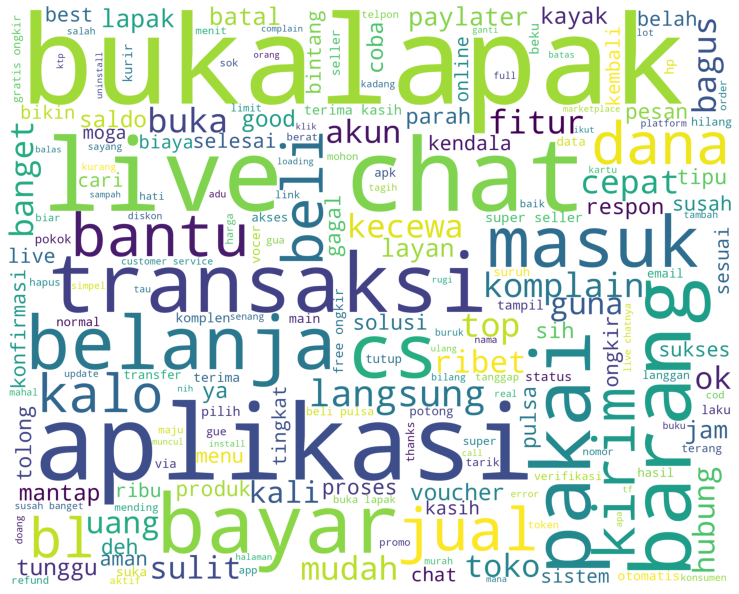

Negative words


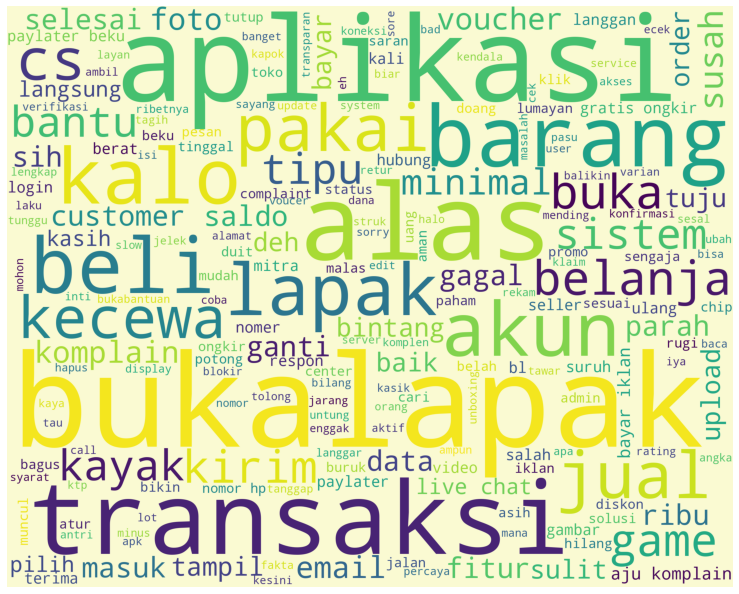

Neutral words


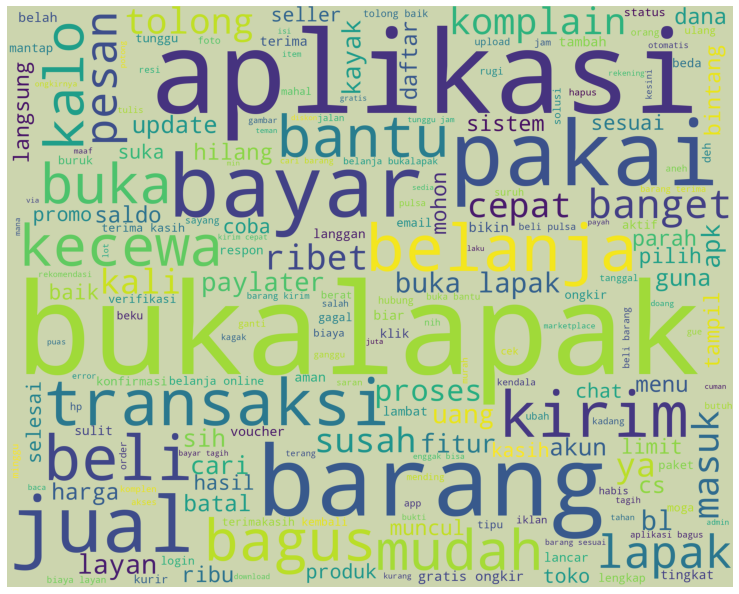

In [ ]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = '#FAFAD2'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not word.startswith('nya')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'#ccd5ae')

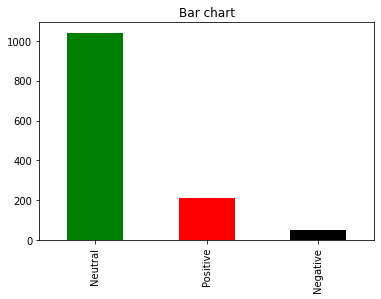

In [ ]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [ ]:
name_dataframe["Sentiment"].value_counts()

Neutral     1041
Positive     210
Negative      49
Name: Sentiment, dtype: int64

In [ ]:
name_dataframe["Sentiment"].value_counts()

Neutral     1041
Positive     210
Negative      49
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
Ulasan = name_dataframe['Ulasan_clean']

In [ ]:
Ulasan.isnull().sum()

0

In [ ]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3623


In [ ]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'kecewa': 1504,
 'fitur': 1087,
 'komplen': 1629,
 'live': 1857,
 'chat': 684,
 'satusatunya': 2866,
 'akses': 67,
 'berfungsihatihati': 391,
 'transaksi': 3403,
 'aplikasi': 174,
 'bl': 465,
 'xufsinv': 3606,
 'proses': 2640,
 'lebih': 1812,
 'batas': 313,
 'maksimal': 1916,
 'dbatalkan': 796,
 'uang': 3455,
 'tahan': 3195,
 'jelasjelas': 1395,
 'tera': 3275,
 'otomatis': 2344,
 'batal': 308,
 'terang': 3276,
 'parah': 2394,
 'belanja': 348,
 'cc': 649,
 'pilih': 2552,
 'klik': 1601,
 'cicil': 695,
 'tagih': 3193,
 'full': 1103,
 'confirmasi': 718,
 'urus': 3506,
 'teman': 3261,
 'metode': 2054,
 'korban': 1657,
 'kabar': 1428,
 'bukalapak': 545,
 'bantu': 282,
 'mudah': 2104,
 'berbelanjatp': 384,
 'tolong': 3385,
 'bayar': 321,
 'produk': 2620,
 'beli': 354,
 'bebas': 330,
 'sulit': 3167,
 'contohhanya': 722,
 'laku': 1743,
 'pakai': 2377,
 'dana': 771,
 'apa': 159,
 'banyak': 287,
 'diskon': 908,
 'ongkir': 2308,
 'nya': 2247,
 'tf': 3319,
 'virtual': 3538,
 'account': 8,
 'nomina

In [ ]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 67)	1
  (0, 174)	1
  (0, 308)	2
  (0, 313)	1
  (0, 391)	1
  (0, 465)	1
  (0, 684)	1
  (0, 796)	1
  (0, 1087)	1
  (0, 1395)	1
  (0, 1504)	1
  (0, 1629)	2
  (0, 1812)	2
  (0, 1857)	1
  (0, 1916)	1
  (0, 2344)	2
  (0, 2640)	3
  (0, 2866)	1
  (0, 3195)	2
  (0, 3275)	1
  (0, 3276)	1
  (0, 3403)	3
  (0, 3455)	2
  (0, 3606)	1
  (1, 174)	1
  :	:
  (1297, 3506)	1
  (1298, 348)	1
  (1298, 2111)	1
  (1298, 3056)	1
  (1298, 3163)	1
  (1299, 85)	1
  (1299, 105)	1
  (1299, 134)	1
  (1299, 255)	1
  (1299, 341)	2
  (1299, 545)	1
  (1299, 771)	3
  (1299, 1243)	1
  (1299, 1368)	1
  (1299, 1625)	1
  (1299, 1803)	1
  (1299, 1910)	1
  (1299, 2024)	1
  (1299, 2247)	1
  (1299, 2286)	1
  (1299, 2332)	1
  (1299, 3185)	1
  (1299, 3262)	1
  (1299, 3390)	1
  (1299, 3490)	1


In [ ]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

aplikasi parah belanja cc pilih klik cicil tagih full confirmasi urus teman belanja metode cicil korban kabar bukalapak


In [ ]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 174)	1
  (0, 348)	2
  (0, 545)	1
  (0, 649)	1
  (0, 695)	2
  (0, 718)	1
  (0, 1103)	1
  (0, 1428)	1
  (0, 1601)	1
  (0, 1657)	1
  (0, 2054)	1
  (0, 2394)	1
  (0, 2552)	1
  (0, 3193)	1
  (0, 3261)	1
  (0, 3506)	1


In [ ]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.78459412 7.07227619 7.4777413  ... 7.4777413  7.07227619 7.4777413 ]
  (0, 3506)	0.2404908926967151
  (0, 3261)	0.22122951765483548
  (0, 3193)	0.18471625994501012
  (0, 2552)	0.17620692208123723
  (0, 2394)	0.16571843135851363
  (0, 2054)	0.21874503986590346
  (0, 1657)	0.2688969878271128
  (0, 1601)	0.1903389447355057
  (0, 1428)	0.2688969878271128
  (0, 1103)	0.2614252074724304
  (0, 718)	0.30644780304602864
  (0, 695)	0.5102158143913356
  (0, 649)	0.27804170791563093
  (0, 545)	0.08712152498037566
  (0, 348)	0.23503479197841465
  (0, 174)	0.09585558283279454


In [ ]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [ ]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-70-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [ ]:
data_label.to_excel("data_label.xlsx")

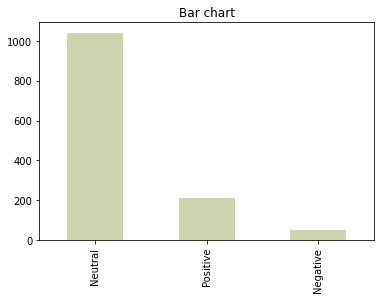

In [ ]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

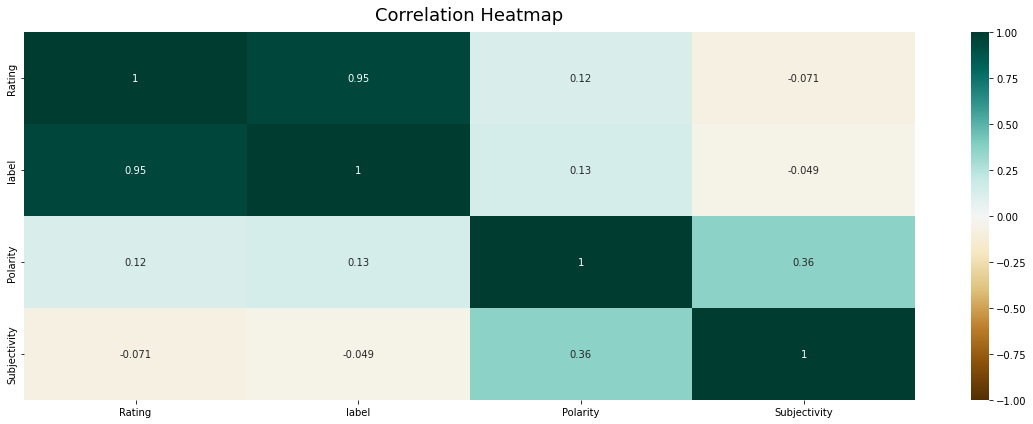

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [ ]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [ ]:
from wordcloud import WordCloud

In [ ]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [ ]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-77-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [ ]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
5,Achenk Chonsleth,lumayan bagus minus sedia menu layan varian pr...,Negative
15,Endi irawan,beli barang nonfisik chip game inti barang fis...,Negative
52,david james,order alamat kirim laku lapak bilang kode book...,Negative
55,Trade Day,kecewa sihketika voucher voucher alas voucher ...,Negative
73,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
74,Nyon bae,aplikasi guna ganti nomor hp kirim foto ktp ga...,Negative
81,Ahmad Amek,maaf turun bintangnyakarena pakai bukalapak pa...,Negative
95,Cucu Latipah,sengaja bintang biar baca isi saldo atm tangga...,Negative
102,Annisa Arifah,kecewa sellernya fiturnya live chat susah tamb...,Negative
184,Tegar Ibnu,sih asih voucher gratis ongkir minimal potong ...,Negative


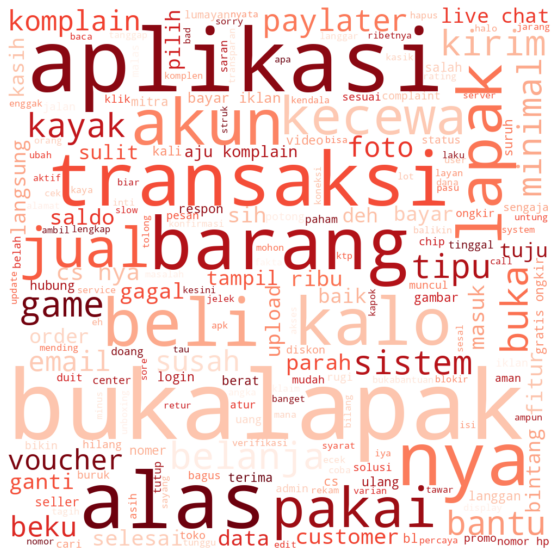

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

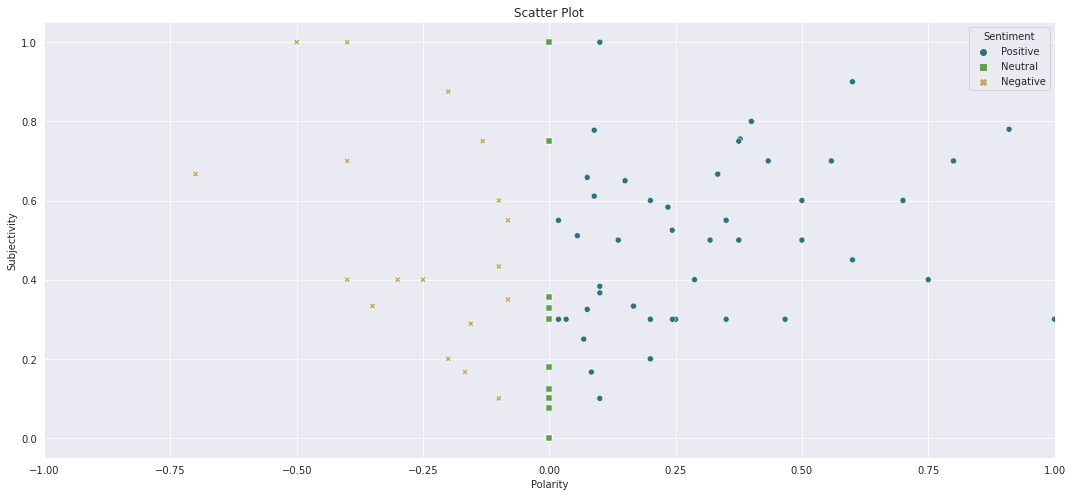

In [ ]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [ ]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [ ]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-82-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [ ]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
0,Pian Sopian,kecewa fitur komplen live chat satusatunya aks...,Positive
1,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,Positive
3,CKN Official,tf uang virtual account nominal ribu notifikas...,Positive
10,Joy Ciska,halooooo bukalapak produk ribu muncul cari bel...,Positive
12,Fazri ahmad Faisal,nih bukalapak ganti no hp ribet nya kayak emak...,Positive
...,...,...,...
1268,Pengguna Google,ya bintang kalo normal app blnya tambah bintan...,Positive
1289,Pengguna Google,commerce nilai super nego pakai harga segitu t...,Positive
1291,KARMAD ZAIN,kecewa aplikasi bukalapak fitur zonk spin top ...,Positive
1295,Rahmat putra,kendala bayar cari solusi live chat ketemu ket...,Positive


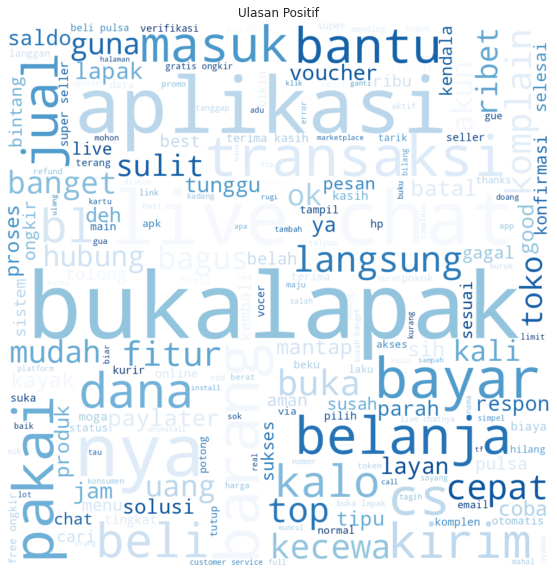

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-85-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen 
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3376)
(130, 3376)


**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.55555556 0.58119658 0.51709402 0.48717949 0.5982906 ]
Confusion Matrix:
 [[ 0  4  1]
 [10 59 35]
 [ 1 16  4]]


In [ ]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 0  4  1]
 [10 59 35]
 [ 1 16  4]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.75      0.57      0.64       104
    Positive       0.10      0.19      0.13        21

    accuracy                           0.48       130
   macro avg       0.28      0.25      0.26       130
weighted avg       0.61      0.48      0.54       130



In [ ]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

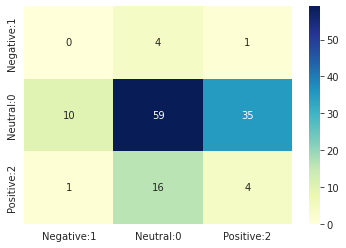

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

In [ ]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(y_train)

<Axes: >

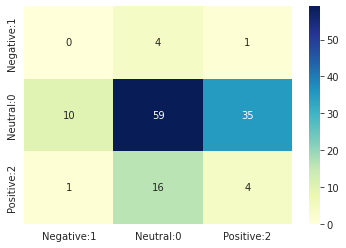

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [ ]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [ ]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.85      1.00      0.92       104
    Positive       1.00      0.38      0.55        21

    accuracy                           0.86       130
   macro avg       0.62      0.46      0.49       130
weighted avg       0.84      0.86      0.83       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.85      1.00      0.92       104
    Positive       1.00      0.33      0.50        21

    accuracy                           0.85       130
   macro avg       0.62      0.44      0.47       130
weighted avg       0.84      0.85      0.81       130



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat